In [1]:
from gdpyt import GdpytImageCollection, GdpytCalibrationSet
from gdpyt.utils.evaluation import GdpytPerformanceEvaluation
from os.path import join
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
%matplotlib notebook

Load calibration images

In [6]:
filetype = '.tif'
processing = {
    'cv2.convertScaleAbs': {'args': [], 'kwargs': dict(alpha=0.5, beta=0)},
    #'cv2.GaussianBlur': {'args': [(5, 5), 5]},
    'cv2.medianBlur': {'args': [5]}
}
exclude = ['calib_{}.tif'.format(int(x)) for x in range(41, 56)]
exclude += ['calib_{}.tif'.format(int(x)) for x in range(2)]
folder = r'C:\Users\silus\UCSB\master_thesis\python_stuff\gdpyt\tests\test_data\chip2test1\50X\calib'
calib_col = GdpytImageCollection(folder, filetype, processing_specs=processing,
                                 min_particle_size=30, max_particle_size=5000, shape_tol=0.9, exclude=exclude)
calib_col.uniformize_particle_ids(threshold=30)
name_to_z = {}
for image in calib_col.images.values():
    name_to_z.update({image.filename: float(image.filename.split('_')[-1].split(filetype)[0])})

exclude_from_calib = []
for fname in calib_col.images.keys():
    depth = int(fname.split('_')[-1].split('.')[0])
    if depth > 32 or depth < 2:
        exclude_from_calib.append(fname)
calib_set = calib_col.create_calibration(name_to_z, dilate=True, exclude=exclude_from_calib)

INFO:root:Filtered image calib_10.tif
INFO:root:Filtered image calib_11.tif
INFO:root:Filtered image calib_12.tif
INFO:root:Filtered image calib_13.tif
INFO:root:Filtered image calib_14.tif
INFO:root:Filtered image calib_15.tif
INFO:root:Filtered image calib_16.tif
INFO:root:Filtered image calib_17.tif
INFO:root:Filtered image calib_18.tif
INFO:root:Filtered image calib_19.tif
INFO:root:Filtered image calib_2.tif
INFO:root:Filtered image calib_20.tif
INFO:root:Filtered image calib_21.tif
INFO:root:Filtered image calib_22.tif
INFO:root:Filtered image calib_23.tif
INFO:root:Filtered image calib_24.tif
INFO:root:Filtered image calib_25.tif
INFO:root:Filtered image calib_26.tif
INFO:root:Filtered image calib_27.tif
INFO:root:Filtered image calib_28.tif
INFO:root:Filtered image calib_29.tif
INFO:root:Filtered image calib_3.tif
INFO:root:Filtered image calib_30.tif
INFO:root:Filtered image calib_31.tif
INFO:root:Filtered image calib_32.tif
INFO:root:Filtered image calib_33.tif
INFO:root:Filt

In [7]:
calib_set.zero_stacks()

INFO:gdpyt.GdpytCalibrationStack:Zeroing calibration stack 0. Found in-focus z position at 20.391959798994975
INFO:gdpyt.GdpytCalibrationStack:Zeroing calibration stack 1. Found in-focus z position at 20.819095477386934
INFO:gdpyt.GdpytCalibrationStack:Zeroing calibration stack 2. Found in-focus z position at 21.547738693467338
INFO:gdpyt.GdpytCalibrationStack:Zeroing calibration stack 3. Found in-focus z position at 20.994974874371856
INFO:gdpyt.GdpytCalibrationStack:Zeroing calibration stack 4. Found in-focus z position at 27.929648241206028
INFO:gdpyt.GdpytCalibrationStack:Zeroing calibration stack 5. Found in-focus z position at 25.36683417085427
INFO:gdpyt.GdpytCalibrationStack:Zeroing calibration stack 6. Found in-focus z position at 19.93969849246231


<IPython.core.display.Javascript object>


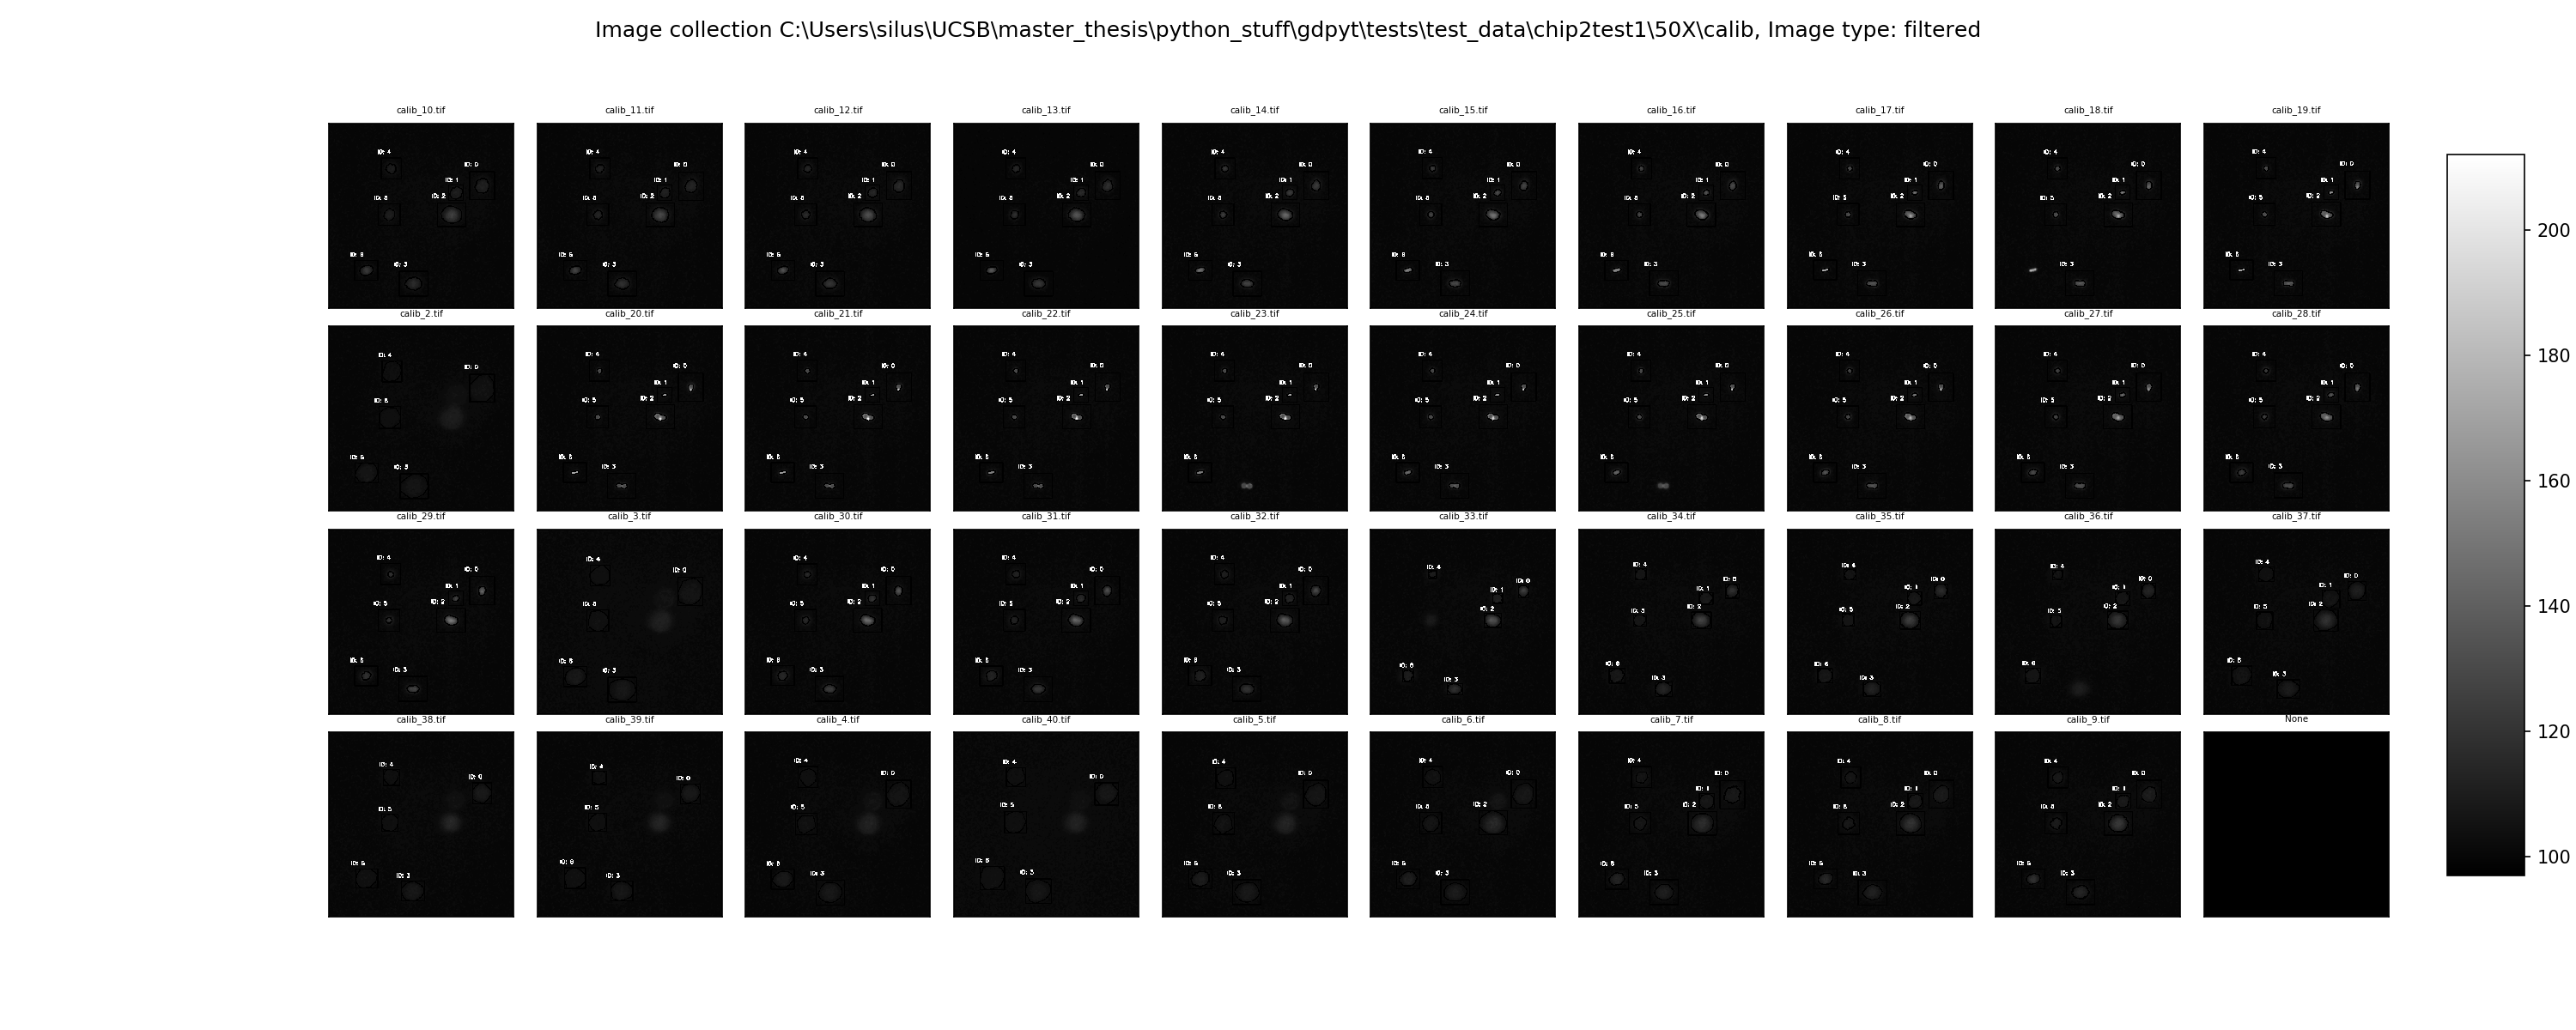

In [8]:
fig = calib_col.plot(raw=False, draw_particles=True)
fig.subplots_adjust(hspace=0.1)
fig.show()


Load test images

In [9]:
folder = r'C:\Users\silus\UCSB\master_thesis\python_stuff\gdpyt\tests\test_data\chip2test1\50X\test\chip1_E20_P2_f0.25_Obj50X_FPNR5_run_22'
collection = GdpytImageCollection(folder, filetype, processing_specs=processing,
                                 min_particle_size=30, max_particle_size=5000, shape_tol=None)
collection.uniformize_particle_ids(baseline=calib_set, threshold=30)

INFO:root:Filtered image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_0.tif
INFO:root:Filtered image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_1.tif
INFO:root:Filtered image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_10.tif
INFO:root:Filtered image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_100.tif
INFO:root:Filtered image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_101.tif
INFO:root:Filtered image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_102.tif
INFO:root:Filtered image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_103.tif
INFO:root:Filtered image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_104.tif
INFO:root:Filtered image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_105.tif
INFO:root:Filtered image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_106.tif
INFO:root:Filtered image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_107.tif
INFO:root:Filtered image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_108.tif
INFO:root:Filtered image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_109.tif
INFO:root:Filtered image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_11.tif
INFO:root:Fi

INFO:root:Filtered image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_90.tif
INFO:root:Filtered image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_91.tif
INFO:root:Filtered image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_92.tif
INFO:root:Filtered image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_93.tif
INFO:root:Filtered image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_94.tif
INFO:root:Filtered image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_95.tif
INFO:root:Filtered image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_96.tif
INFO:root:Filtered image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_97.tif
INFO:root:Filtered image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_98.tif
INFO:root:Filtered image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_99.tif
INFO:root:Identified 7 particles on image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_0.tif
INFO:root:Identified 7 particles on image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_1.tif
INFO:root:Identified 7 particles on image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_10.tif
INFO:root:Identified 7 particles on image

INFO:root:Identified 7 particles on image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_69.tif
INFO:root:Identified 7 particles on image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_7.tif
INFO:root:Identified 7 particles on image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_70.tif
INFO:root:Identified 7 particles on image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_71.tif
INFO:root:Identified 7 particles on image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_72.tif
INFO:root:Identified 7 particles on image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_73.tif
INFO:root:Identified 7 particles on image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_74.tif
INFO:root:Identified 7 particles on image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_75.tif
INFO:root:Identified 7 particles on image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_76.tif
INFO:root:Identified 7 particles on image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_77.tif
INFO:root:Identified 7 particles on image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_78.tif
INFO:root:Identified 7 particles on image ch

<IPython.core.display.Javascript object>


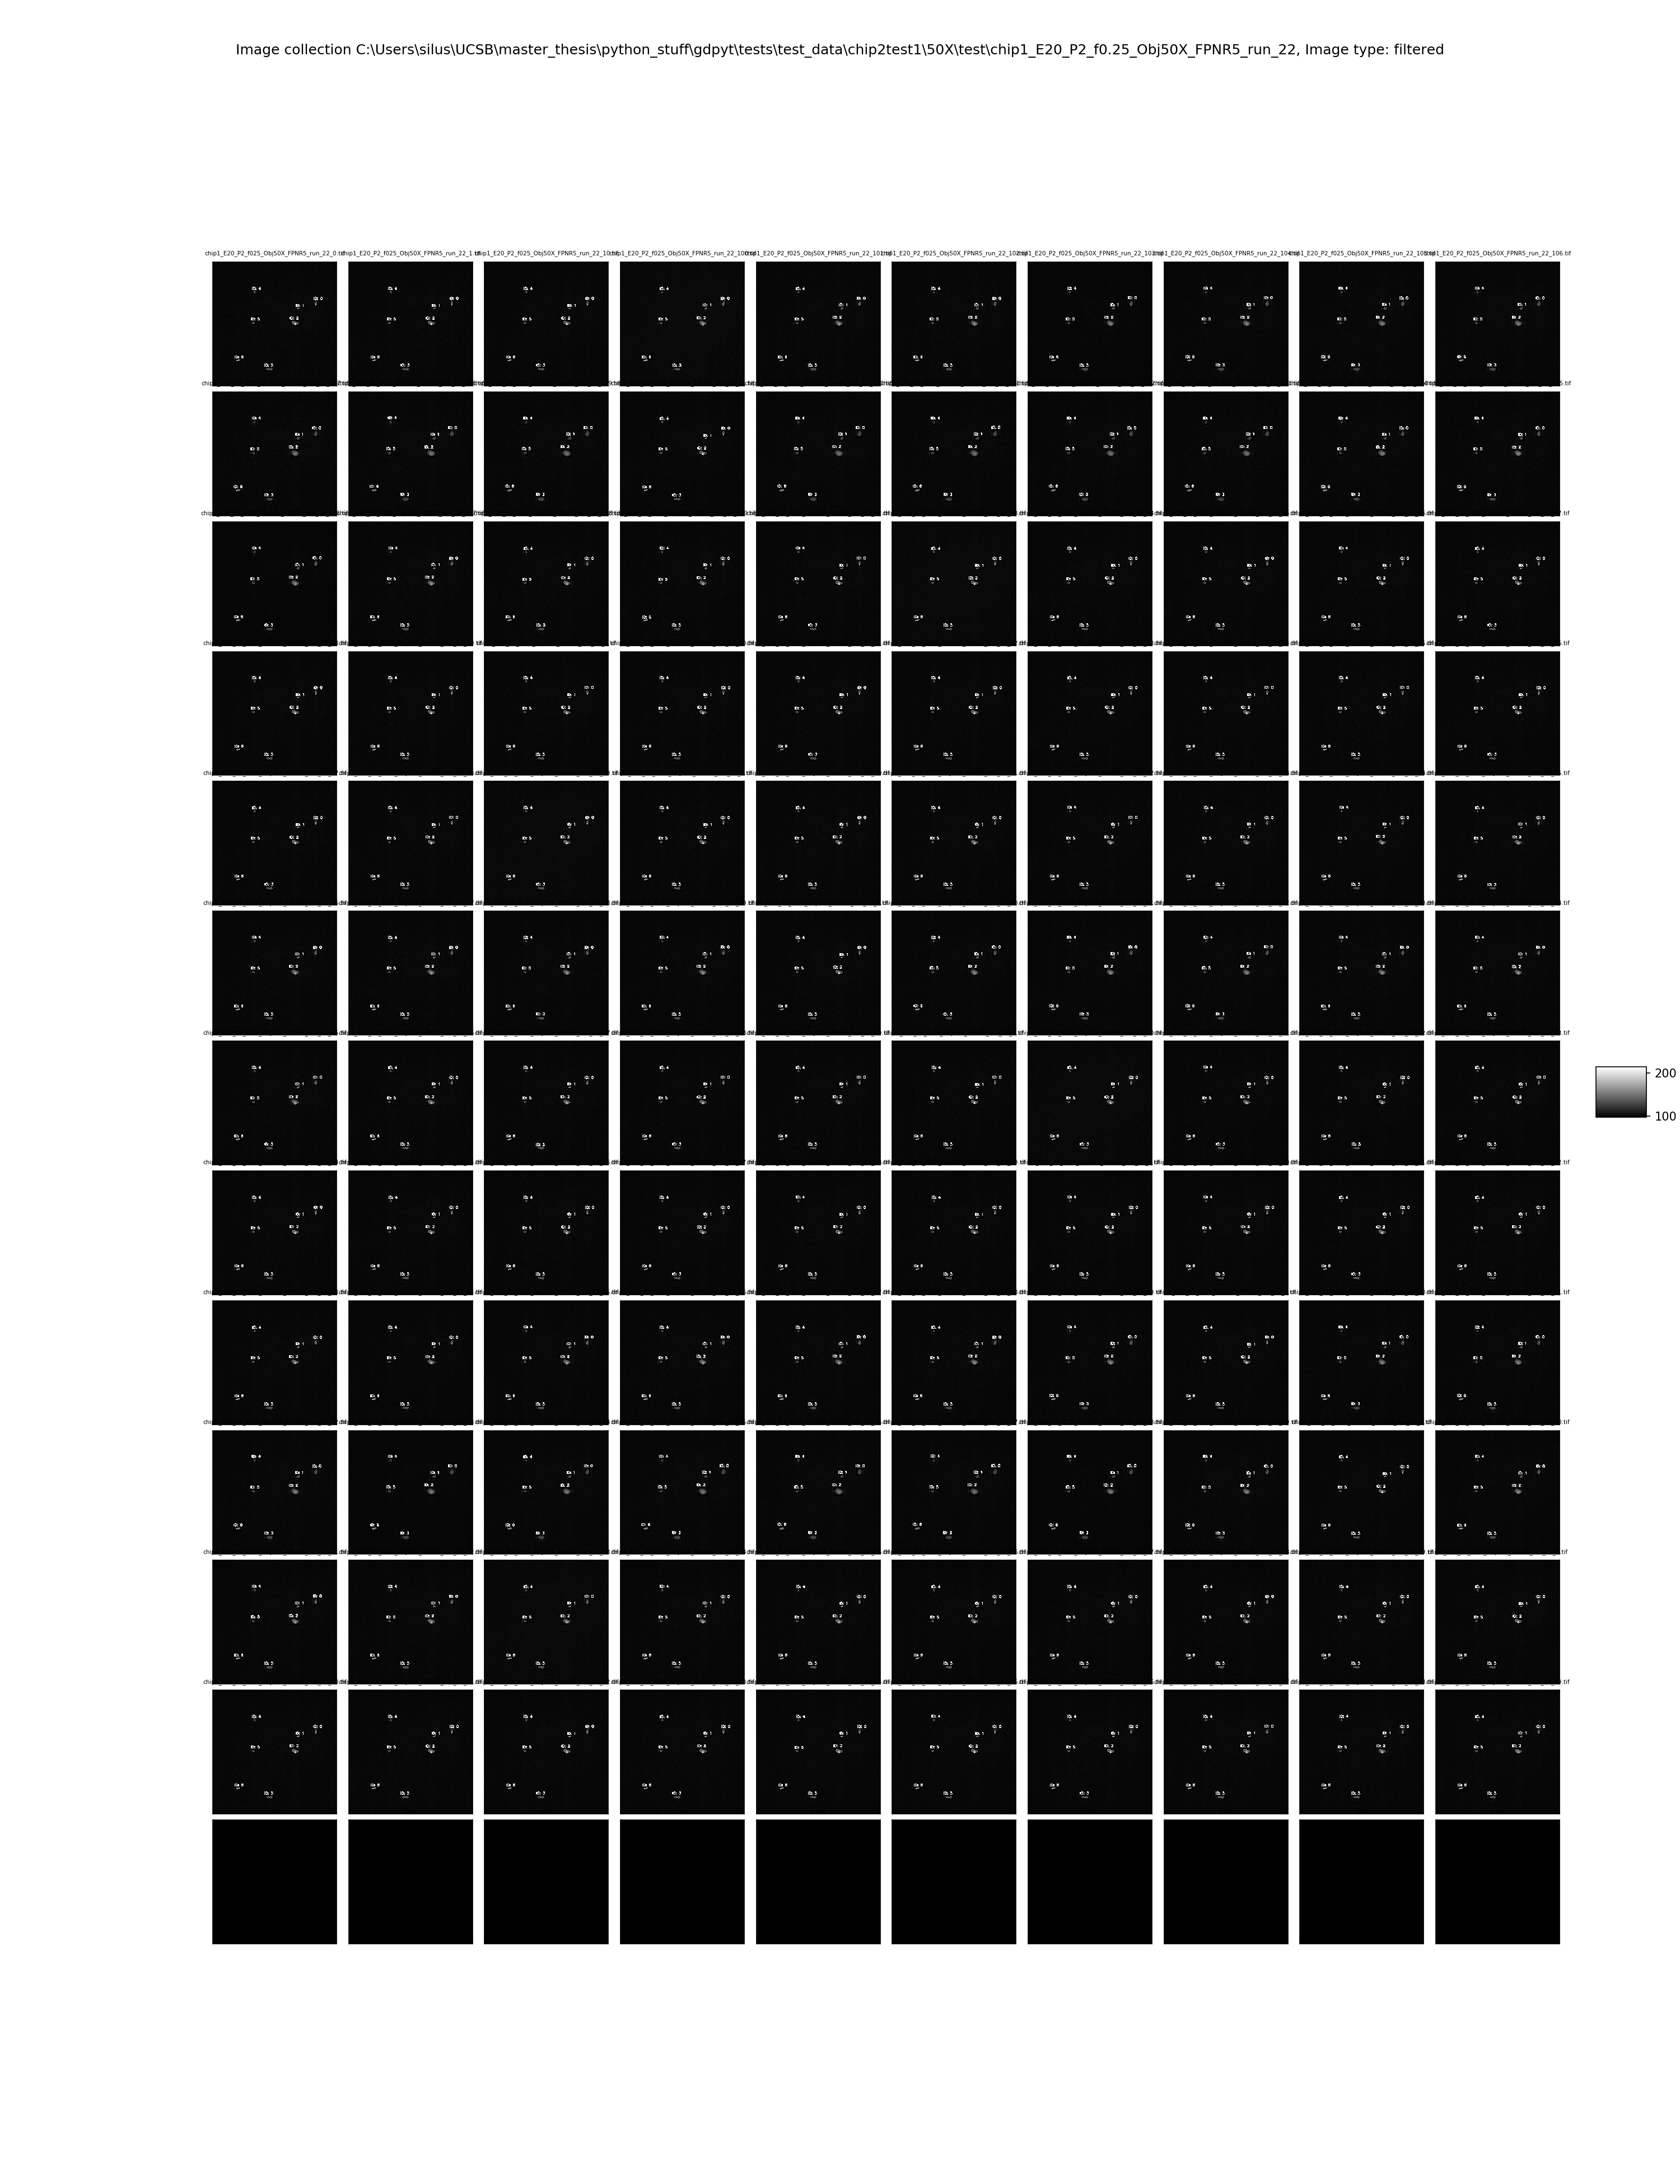

In [10]:
fig = collection.plot(raw=False, draw_particles=True)
fig.show()

Infer z

In [11]:
collection.infer_z(calib_set, function='znccorr')

INFO:gdpyt.GdpytCalibrationSet:Infering image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_0.tif
INFO:gdpyt.GdpytCalibrationStack:Infering particle 0
INFO:gdpyt.GdpytCalibrationStack:Infering particle 1
INFO:gdpyt.GdpytCalibrationStack:Infering particle 2
INFO:gdpyt.GdpytCalibrationStack:Infering particle 3
INFO:gdpyt.GdpytCalibrationStack:Infering particle 4
INFO:gdpyt.GdpytCalibrationStack:Infering particle 5
INFO:gdpyt.GdpytCalibrationStack:Infering particle 6
INFO:gdpyt.GdpytCalibrationSet:Infering image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_1.tif
INFO:gdpyt.GdpytCalibrationStack:Infering particle 0
INFO:gdpyt.GdpytCalibrationStack:Infering particle 1
INFO:gdpyt.GdpytCalibrationStack:Infering particle 2
INFO:gdpyt.GdpytCalibrationStack:Infering particle 3
INFO:gdpyt.GdpytCalibrationStack:Infering particle 4
INFO:gdpyt.GdpytCalibrationStack:Infering particle 5
INFO:gdpyt.GdpytCalibrationStack:Infering particle 6
INFO:gdpyt.GdpytCalibrationSet:Infering image chip1_E20_P2_f025_Obj50X_FPNR5_r

INFO:gdpyt.GdpytCalibrationStack:Infering particle 5
INFO:gdpyt.GdpytCalibrationStack:Infering particle 6
INFO:gdpyt.GdpytCalibrationSet:Infering image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_114.tif
INFO:gdpyt.GdpytCalibrationStack:Infering particle 0
INFO:gdpyt.GdpytCalibrationStack:Infering particle 1
INFO:gdpyt.GdpytCalibrationStack:Infering particle 2
INFO:gdpyt.GdpytCalibrationStack:Infering particle 3
INFO:gdpyt.GdpytCalibrationStack:Infering particle 4
INFO:gdpyt.GdpytCalibrationStack:Infering particle 5
INFO:gdpyt.GdpytCalibrationStack:Infering particle 6
INFO:gdpyt.GdpytCalibrationSet:Infering image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_115.tif
INFO:gdpyt.GdpytCalibrationStack:Infering particle 0
INFO:gdpyt.GdpytCalibrationStack:Infering particle 1
INFO:gdpyt.GdpytCalibrationStack:Infering particle 2
INFO:gdpyt.GdpytCalibrationStack:Infering particle 3
INFO:gdpyt.GdpytCalibrationStack:Infering particle 4
INFO:gdpyt.GdpytCalibrationStack:Infering particle 5
INFO:gdpyt.GdpytCalib

INFO:gdpyt.GdpytCalibrationStack:Infering particle 3
INFO:gdpyt.GdpytCalibrationStack:Infering particle 4
INFO:gdpyt.GdpytCalibrationStack:Infering particle 5
INFO:gdpyt.GdpytCalibrationStack:Infering particle 6
INFO:gdpyt.GdpytCalibrationSet:Infering image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_23.tif
INFO:gdpyt.GdpytCalibrationStack:Infering particle 0
INFO:gdpyt.GdpytCalibrationStack:Infering particle 1
INFO:gdpyt.GdpytCalibrationStack:Infering particle 2
INFO:gdpyt.GdpytCalibrationStack:Infering particle 3
INFO:gdpyt.GdpytCalibrationStack:Infering particle 4
INFO:gdpyt.GdpytCalibrationStack:Infering particle 5
INFO:gdpyt.GdpytCalibrationStack:Infering particle 6
INFO:gdpyt.GdpytCalibrationSet:Infering image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_24.tif
INFO:gdpyt.GdpytCalibrationStack:Infering particle 0
INFO:gdpyt.GdpytCalibrationStack:Infering particle 1
INFO:gdpyt.GdpytCalibrationStack:Infering particle 2
INFO:gdpyt.GdpytCalibrationStack:Infering particle 3
INFO:gdpyt.GdpytCalibra

INFO:gdpyt.GdpytCalibrationStack:Infering particle 1
INFO:gdpyt.GdpytCalibrationStack:Infering particle 2
INFO:gdpyt.GdpytCalibrationStack:Infering particle 3
INFO:gdpyt.GdpytCalibrationStack:Infering particle 4
INFO:gdpyt.GdpytCalibrationStack:Infering particle 5
INFO:gdpyt.GdpytCalibrationStack:Infering particle 6
INFO:gdpyt.GdpytCalibrationSet:Infering image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_4.tif
INFO:gdpyt.GdpytCalibrationStack:Infering particle 0
INFO:gdpyt.GdpytCalibrationStack:Infering particle 1
INFO:gdpyt.GdpytCalibrationStack:Infering particle 2
INFO:gdpyt.GdpytCalibrationStack:Infering particle 3
INFO:gdpyt.GdpytCalibrationStack:Infering particle 4
INFO:gdpyt.GdpytCalibrationStack:Infering particle 5
INFO:gdpyt.GdpytCalibrationStack:Infering particle 6
INFO:gdpyt.GdpytCalibrationSet:Infering image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_40.tif
INFO:gdpyt.GdpytCalibrationStack:Infering particle 0
INFO:gdpyt.GdpytCalibrationStack:Infering particle 1
INFO:gdpyt.GdpytCalibrat

INFO:gdpyt.GdpytCalibrationStack:Infering particle 0
INFO:gdpyt.GdpytCalibrationStack:Infering particle 1
INFO:gdpyt.GdpytCalibrationStack:Infering particle 2
INFO:gdpyt.GdpytCalibrationStack:Infering particle 3
INFO:gdpyt.GdpytCalibrationStack:Infering particle 4
INFO:gdpyt.GdpytCalibrationStack:Infering particle 5
INFO:gdpyt.GdpytCalibrationStack:Infering particle 6
INFO:gdpyt.GdpytCalibrationSet:Infering image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_56.tif
INFO:gdpyt.GdpytCalibrationStack:Infering particle 0
INFO:gdpyt.GdpytCalibrationStack:Infering particle 1
INFO:gdpyt.GdpytCalibrationStack:Infering particle 2
INFO:gdpyt.GdpytCalibrationStack:Infering particle 3
INFO:gdpyt.GdpytCalibrationStack:Infering particle 4
INFO:gdpyt.GdpytCalibrationStack:Infering particle 5
INFO:gdpyt.GdpytCalibrationStack:Infering particle 6
INFO:gdpyt.GdpytCalibrationSet:Infering image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_57.tif
INFO:gdpyt.GdpytCalibrationStack:Infering particle 0
INFO:gdpyt.GdpytCalibra

INFO:gdpyt.GdpytCalibrationSet:Infering image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_71.tif
INFO:gdpyt.GdpytCalibrationStack:Infering particle 0
INFO:gdpyt.GdpytCalibrationStack:Infering particle 1
INFO:gdpyt.GdpytCalibrationStack:Infering particle 2
INFO:gdpyt.GdpytCalibrationStack:Infering particle 3
INFO:gdpyt.GdpytCalibrationStack:Infering particle 4
INFO:gdpyt.GdpytCalibrationStack:Infering particle 5
INFO:gdpyt.GdpytCalibrationStack:Infering particle 6
INFO:gdpyt.GdpytCalibrationSet:Infering image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_72.tif
INFO:gdpyt.GdpytCalibrationStack:Infering particle 0
INFO:gdpyt.GdpytCalibrationStack:Infering particle 1
INFO:gdpyt.GdpytCalibrationStack:Infering particle 2
INFO:gdpyt.GdpytCalibrationStack:Infering particle 3
INFO:gdpyt.GdpytCalibrationStack:Infering particle 4
INFO:gdpyt.GdpytCalibrationStack:Infering particle 5
INFO:gdpyt.GdpytCalibrationStack:Infering particle 6
INFO:gdpyt.GdpytCalibrationSet:Infering image chip1_E20_P2_f025_Obj50X_FPNR5

INFO:gdpyt.GdpytCalibrationStack:Infering particle 5
INFO:gdpyt.GdpytCalibrationStack:Infering particle 6
INFO:gdpyt.GdpytCalibrationSet:Infering image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_88.tif
INFO:gdpyt.GdpytCalibrationStack:Infering particle 0
INFO:gdpyt.GdpytCalibrationStack:Infering particle 1
INFO:gdpyt.GdpytCalibrationStack:Infering particle 2
INFO:gdpyt.GdpytCalibrationStack:Infering particle 3
INFO:gdpyt.GdpytCalibrationStack:Infering particle 4
INFO:gdpyt.GdpytCalibrationStack:Infering particle 5
INFO:gdpyt.GdpytCalibrationStack:Infering particle 6
INFO:gdpyt.GdpytCalibrationSet:Infering image chip1_E20_P2_f025_Obj50X_FPNR5_run_22_89.tif
INFO:gdpyt.GdpytCalibrationStack:Infering particle 0
INFO:gdpyt.GdpytCalibrationStack:Infering particle 1
INFO:gdpyt.GdpytCalibrationStack:Infering particle 2
INFO:gdpyt.GdpytCalibrationStack:Infering particle 3
INFO:gdpyt.GdpytCalibrationStack:Infering particle 4
INFO:gdpyt.GdpytCalibrationStack:Infering particle 5
INFO:gdpyt.GdpytCalibra

<IPython.core.display.Javascript object>


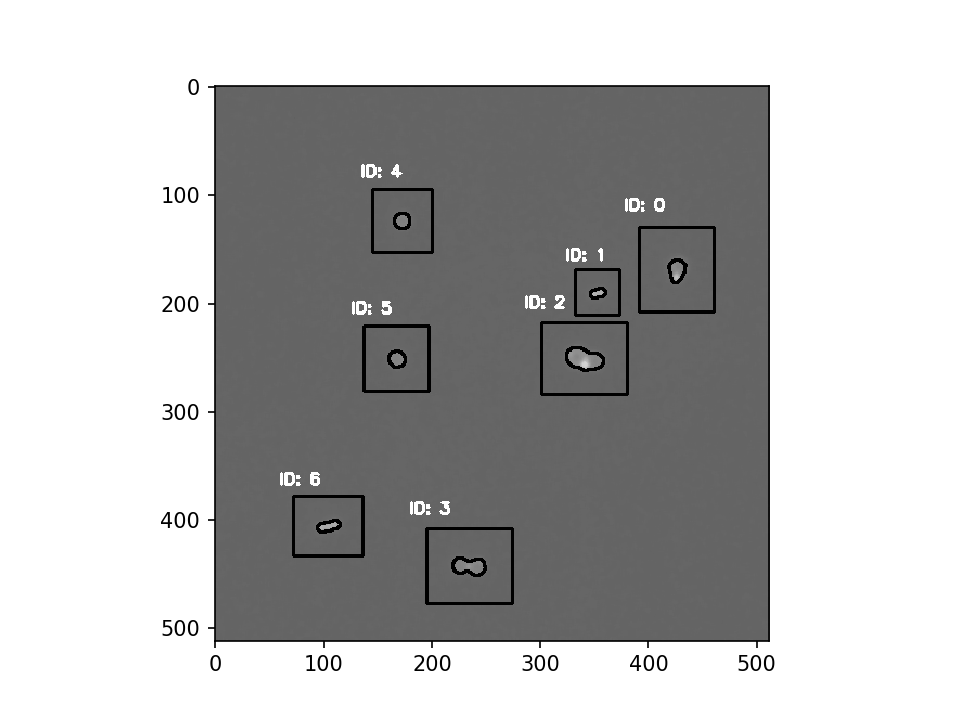

In [29]:
plt.figure()
plt.imshow(collection[36].draw_particles(raw=False), cmap='gray')

<IPython.core.display.Javascript object>


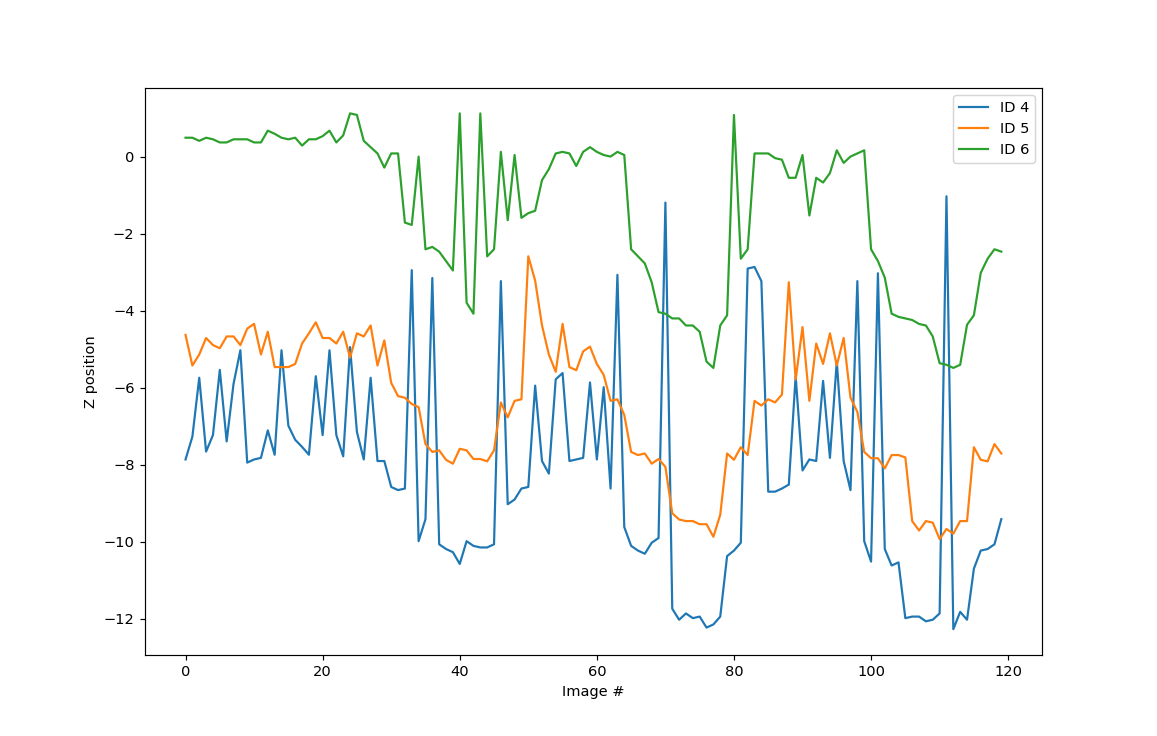

In [35]:
sort_imgs = lambda x: int(x.split('_')[-1].split('.')[0])
fig = collection.plot_particle_coordinate(particle_ids=[4, 5, 6], sort_images=sort_imgs)
fig.show()

Animated surface plot

In [ ]:
collection.plot_animated_surface(sort_images=sort_imgs, fps=20, save_as='run22_znccorr.gif')